# Adaline Classifier

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read the Iris data

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.iloc[0::10]

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa
20,5.4,3.4,1.7,0.2,Iris-setosa
30,4.8,3.1,1.6,0.2,Iris-setosa
40,5.0,3.5,1.3,0.3,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
60,5.0,2.0,3.5,1.0,Iris-versicolor
70,5.9,3.2,4.8,1.8,Iris-versicolor
80,5.5,2.4,3.8,1.1,Iris-versicolor
90,5.5,2.6,4.4,1.2,Iris-versicolor


### Plotting the Iris data

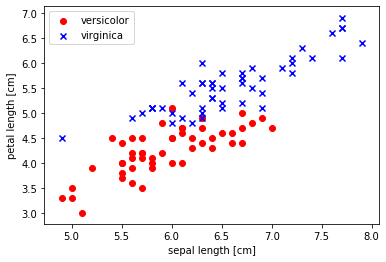

In [3]:
# select setosa and versicolor
y = df.iloc[50:, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)

# extract sepal length and petal length
X = df.iloc[50:, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='versicolor')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='virginica')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

### Implementing an adaptive linear neuron 

In [4]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        n, m =X.shape
        X1 = self.stack1(X)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X1.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            cost, d = self.J_Delta(X1, y)
            self.w_ += d
            self.cost_.append(cost)
        return self
    
    def stack1(self, X):
        """Stack a column of constant 1s to the left of X"""
        n,m = X.shape
        return np.hstack((np.ones((n,1)), X))        
        
    def net_input(self, X1):
        """Calculate net input"""
        return np.dot(X1, self.w_)

    def activation(self, X1):
        """Compute linear activation"""
        return X1
    
    def J_Delta(self, X1, y):
        """Computer the cost function and the gradeint function"""
        n,m = X1.shape
        Z = self.net_input(X1)
        A = self.activation(Z)
        errors = y-A
        cost = (errors**2).sum()/(2.*n)
        d = self.eta*X1.T@ errors/n
        return cost, d
        
        
    def predict(self, X):
        """Return class label after unit step"""
        X1 = self.stack1(X)
        return np.where(self.activation(self.net_input(X1)) >= 0.0, 1, -1)

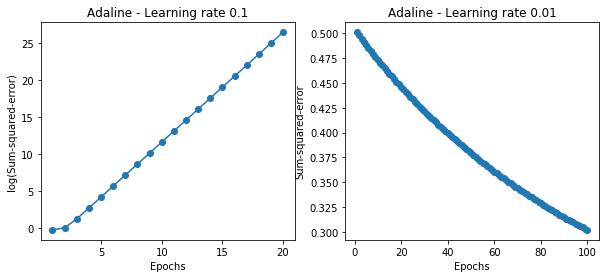

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=20, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = AdalineGD(n_iter=100, eta=0.03).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.01')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

### Plot Decision Regions

In [21]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

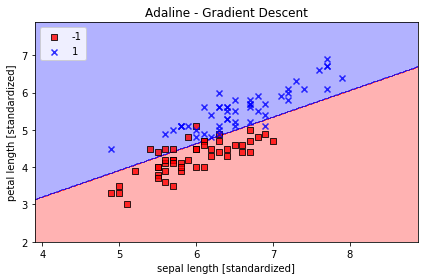

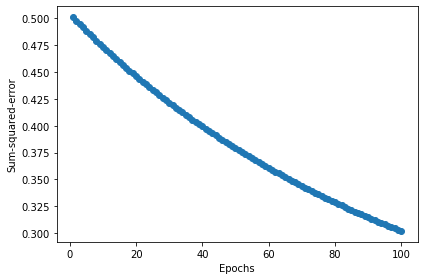

In [27]:
plot_decision_regions(X, y, classifier=ada2)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

## Standardize features

In [28]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

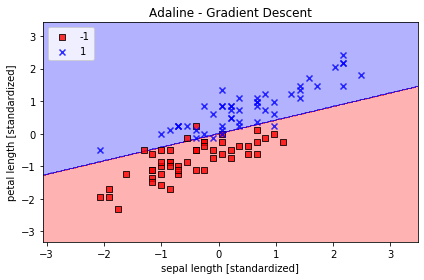

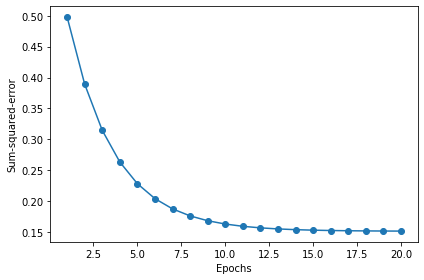

In [29]:
ada = AdalineGD(n_iter=20, eta=1.)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()